In [357]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [358]:
%store -r df

In [359]:
len(df.index)

12211

# Correlation before

In [360]:
# display all df row
pd.options.display.max_rows = 999

### Correlation between price and variables

In [361]:
# df_excluded = df.loc[:, ~df.columns.isin(['price/m2'])]

df_excluded_post_code = df.loc[:,~df.columns.str.startswith('Post code_')]
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2'])]

corr = df_excluded.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                      1.000000
Living area                0.451236
Surface of the plot        0.357749
Bedrooms                   0.327389
Property type_HOUSE        0.283683
Number of frontages        0.202133
Building condition         0.147350
Kitchen type               0.137699
Terrace_Combined           0.107680
garden_label               0.081931
Swimming pool             -0.013529
Immoweb ID                -0.034834
Furnished                 -0.038973
Post_code_orig            -0.103292
Property type_APARTMENT   -0.283683
Name: Price, dtype: float64

### make a graph

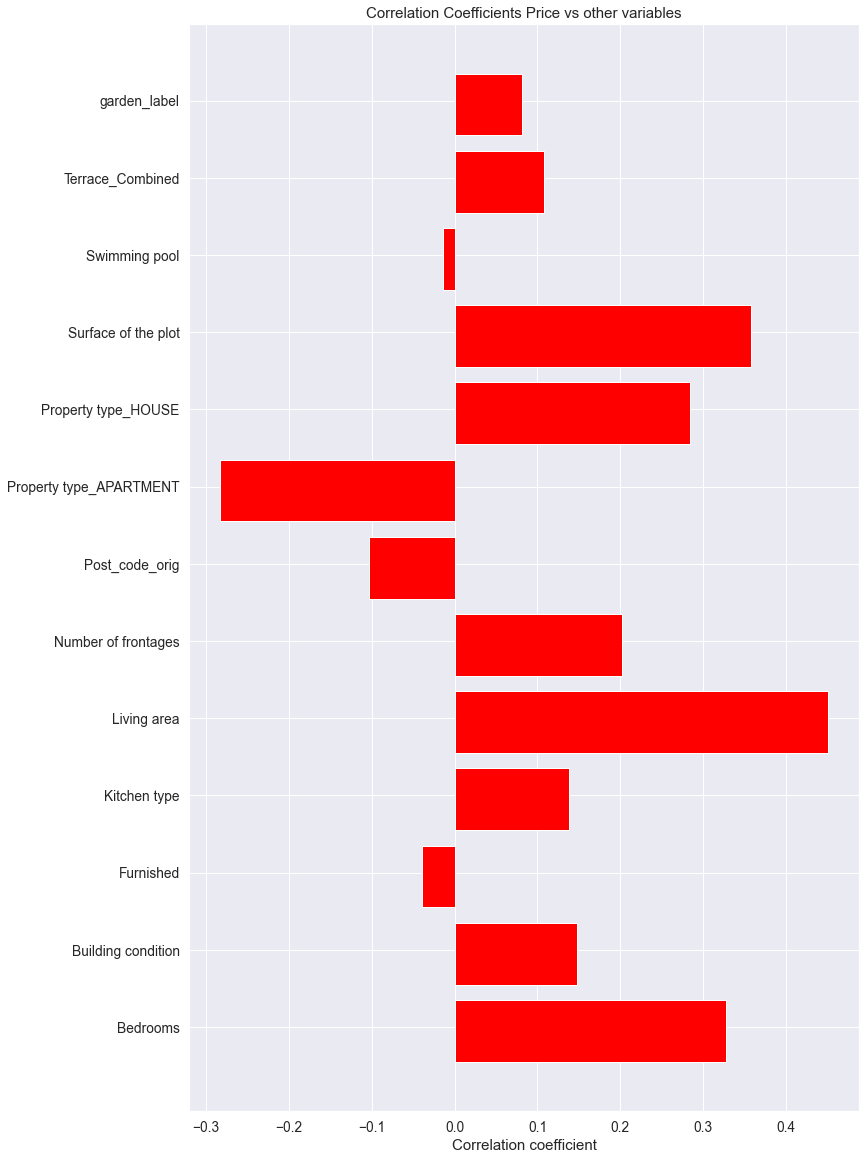

In [365]:
#plotting correlations
num_feat=df_excluded.columns[df_excluded.dtypes!=object]
num_feat=num_feat[2::] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_excluded[col].values, df_excluded.Price.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 20))
rects = ax.barh(ind, np.array(values), color='red', align="edge")



ax.set_yticks(ind + ((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients Price vs other variables");

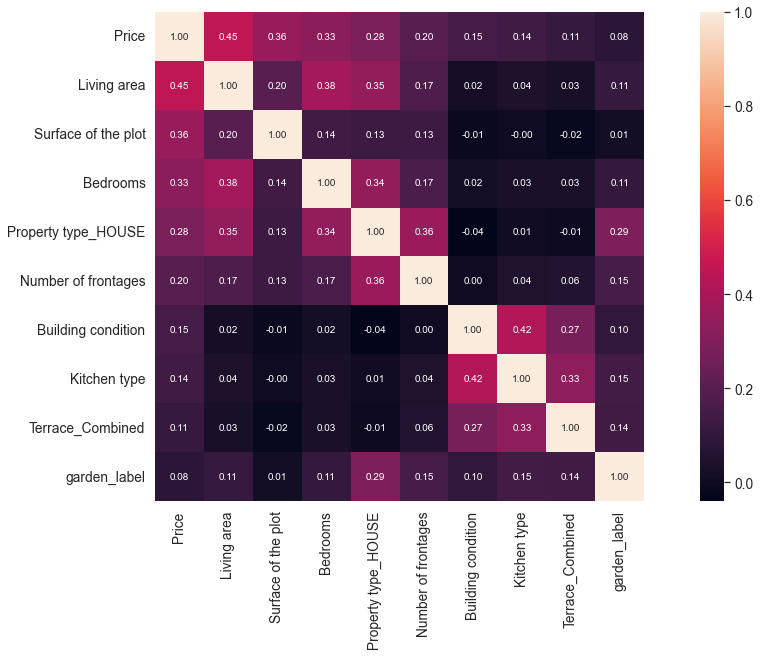

In [335]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Correlation between variables

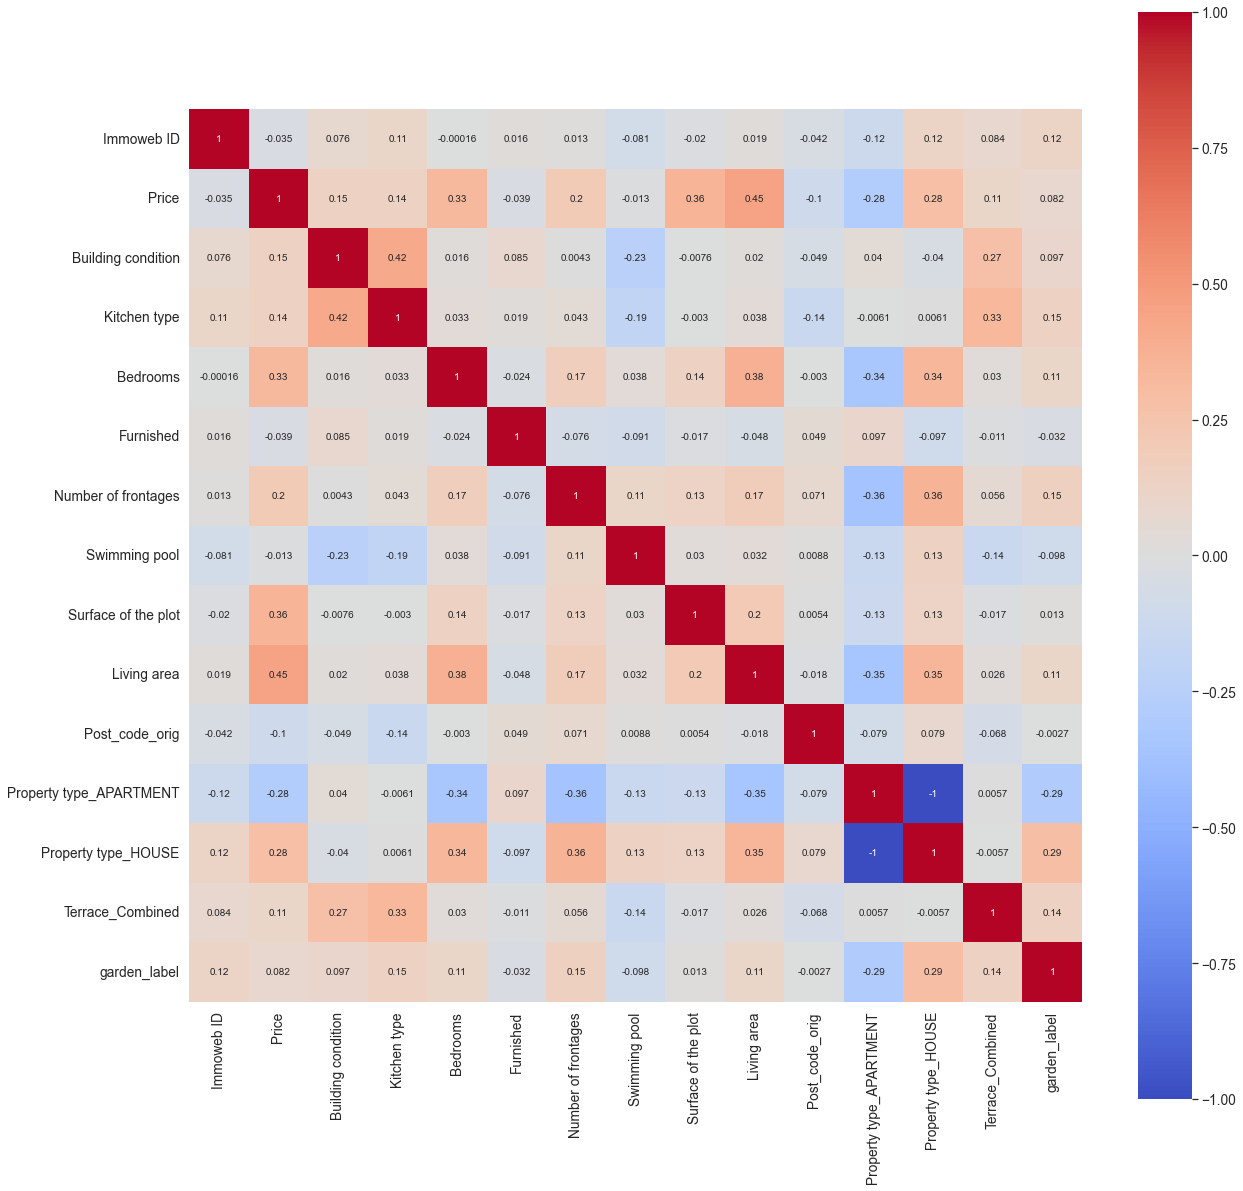

In [366]:
#correlation matrix
corrmat = df_excluded[2::].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True, annot=True, cmap="coolwarm");

# Correlation After

## Bedrooms

<AxesSubplot:xlabel='Bedrooms'>

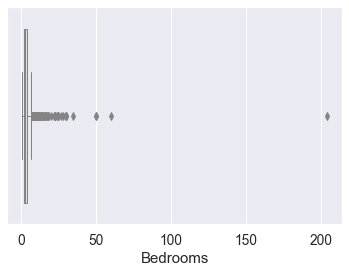

In [337]:
sns.boxplot(x="Bedrooms", data=df, width=0.8, linewidth=1, palette='coolwarm')

In [338]:
test = df
test = df[df["Bedrooms"] <= 20]
test['Bedrooms']

0        1
1        1
2        1
3        3
4        2
        ..
14534    1
14535    1
14536    1
14537    1
14538    2
Name: Bedrooms, Length: 12192, dtype: int64

<AxesSubplot:xlabel='Bedrooms'>

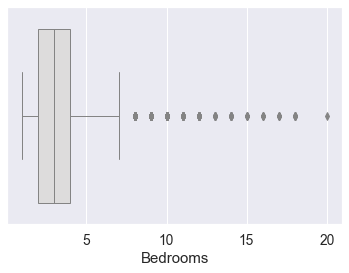

In [339]:
sns.boxplot(x="Bedrooms", data=test, width=0.8, linewidth=1, palette='coolwarm')

In [340]:
test['Bedrooms'].describe()

count    12192.000000
mean         3.043717
std          1.782020
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: Bedrooms, dtype: float64

## Living area

<AxesSubplot:xlabel='Living area'>

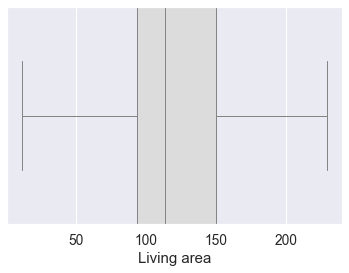

In [352]:
sns.boxplot(x="Living area", data=test, width=1, linewidth=1, palette='coolwarm')

In [342]:
test['Living area'].describe()

count    12192.000000
mean       199.703330
std        255.222244
min         12.000000
25%         95.000000
50%        150.000000
75%        229.250000
max      11000.000000
Name: Living area, dtype: float64

In [343]:
# remove Living area based on 75% of data -> 229.250000
test = df[df["Living area"] <= 229.250000]
test['Living area']

0         63.0
1         42.0
2         42.0
3        150.0
4        120.0
         ...  
14534     95.0
14535     95.0
14536     95.0
14537     95.0
14538     95.0
Name: Living area, Length: 9149, dtype: float64

In [344]:
test['Living area'].describe()

count    9149.000000
mean      119.675812
std        48.240652
min        12.000000
25%        94.000000
50%       114.000000
75%       150.000000
max       229.000000
Name: Living area, dtype: float64

# Result correlation after

In [345]:
t_excluded_post_code = test.loc[:,~test.columns.str.startswith('Post code_')]
t_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2', 'Property type_HOUSE', 'Property type_APARTMENT'])]

corr = t_excluded.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                  1.000000
Living area            0.451236
Surface of the plot    0.357749
Bedrooms               0.327389
Number of frontages    0.202133
Building condition     0.147350
Kitchen type           0.137699
Terrace_Combined       0.107680
garden_label           0.081931
Swimming pool         -0.013529
Immoweb ID            -0.034834
Furnished             -0.038973
Post_code_orig        -0.103292
Name: Price, dtype: float64

## Corr() Price and 5 variables

In [346]:
# 1. Living area
# 2. Bedrooms
# 3. Surface of the plot
# 4. Number of frontages
# 5. Kitchen type
corr_imp = df.loc[:, df.columns.isin(['Price', 'Living area', 'Bedrooms', 'Surface of the plot', 'Number of frontages', 'Kitchen type'])]
corr_imp

,Price,Kitchen type,Bedrooms,Number of frontages,Surface of the plot,Living area
0,179000.0,1.0,1,3,0.0,63.0
1,255000.0,1.0,1,2,0.0,42.0
2,255000.0,1.0,1,2,0.0,42.0
3,620000.0,1.0,3,2,0.0,150.0
4,379000.0,2.0,2,3,0.0,120.0
...,...,...,...,...,...,...
14536,132000.0,0.0,1,3,0.0,95.0
14537,177000.0,0.0,1,3,0.0,95.0
14538,190000.0,0.0,2,3,0.0,95.0
14539,1350000.0,0.0,30,3,0.0,1500.0


## 5 imp corre before

In [347]:
corr_imp_five = corr_imp.corr()["Price"]
corr_imp_five[np.argsort(corr_imp_five, axis=0)[::-1]]

Price                  1.000000
Living area            0.451236
Surface of the plot    0.357749
Bedrooms               0.327389
Number of frontages    0.202133
Kitchen type           0.137699
Name: Price, dtype: float64

## 5 imp corre After

In [348]:
# remove outlier
corr_imp_after = corr_imp[corr_imp["Bedrooms"] <= 20]
corr_imp_after = corr_imp[corr_imp["Living area"] <= 229.250000]
corr_imp_after = corr_imp[corr_imp["Surface of the plot"] <= 736.000000]
corr_imp_after = corr_imp[corr_imp["Number of frontages"] <= 4]


In [349]:
corr_imp_five = corr_imp_after.corr()["Price"]
corr_imp_five[np.argsort(corr_imp_five, axis=0)[::-1]]

Price                  1.000000
Living area            0.451643
Surface of the plot    0.357943
Bedrooms               0.327507
Number of frontages    0.198781
Kitchen type           0.138159
Name: Price, dtype: float64

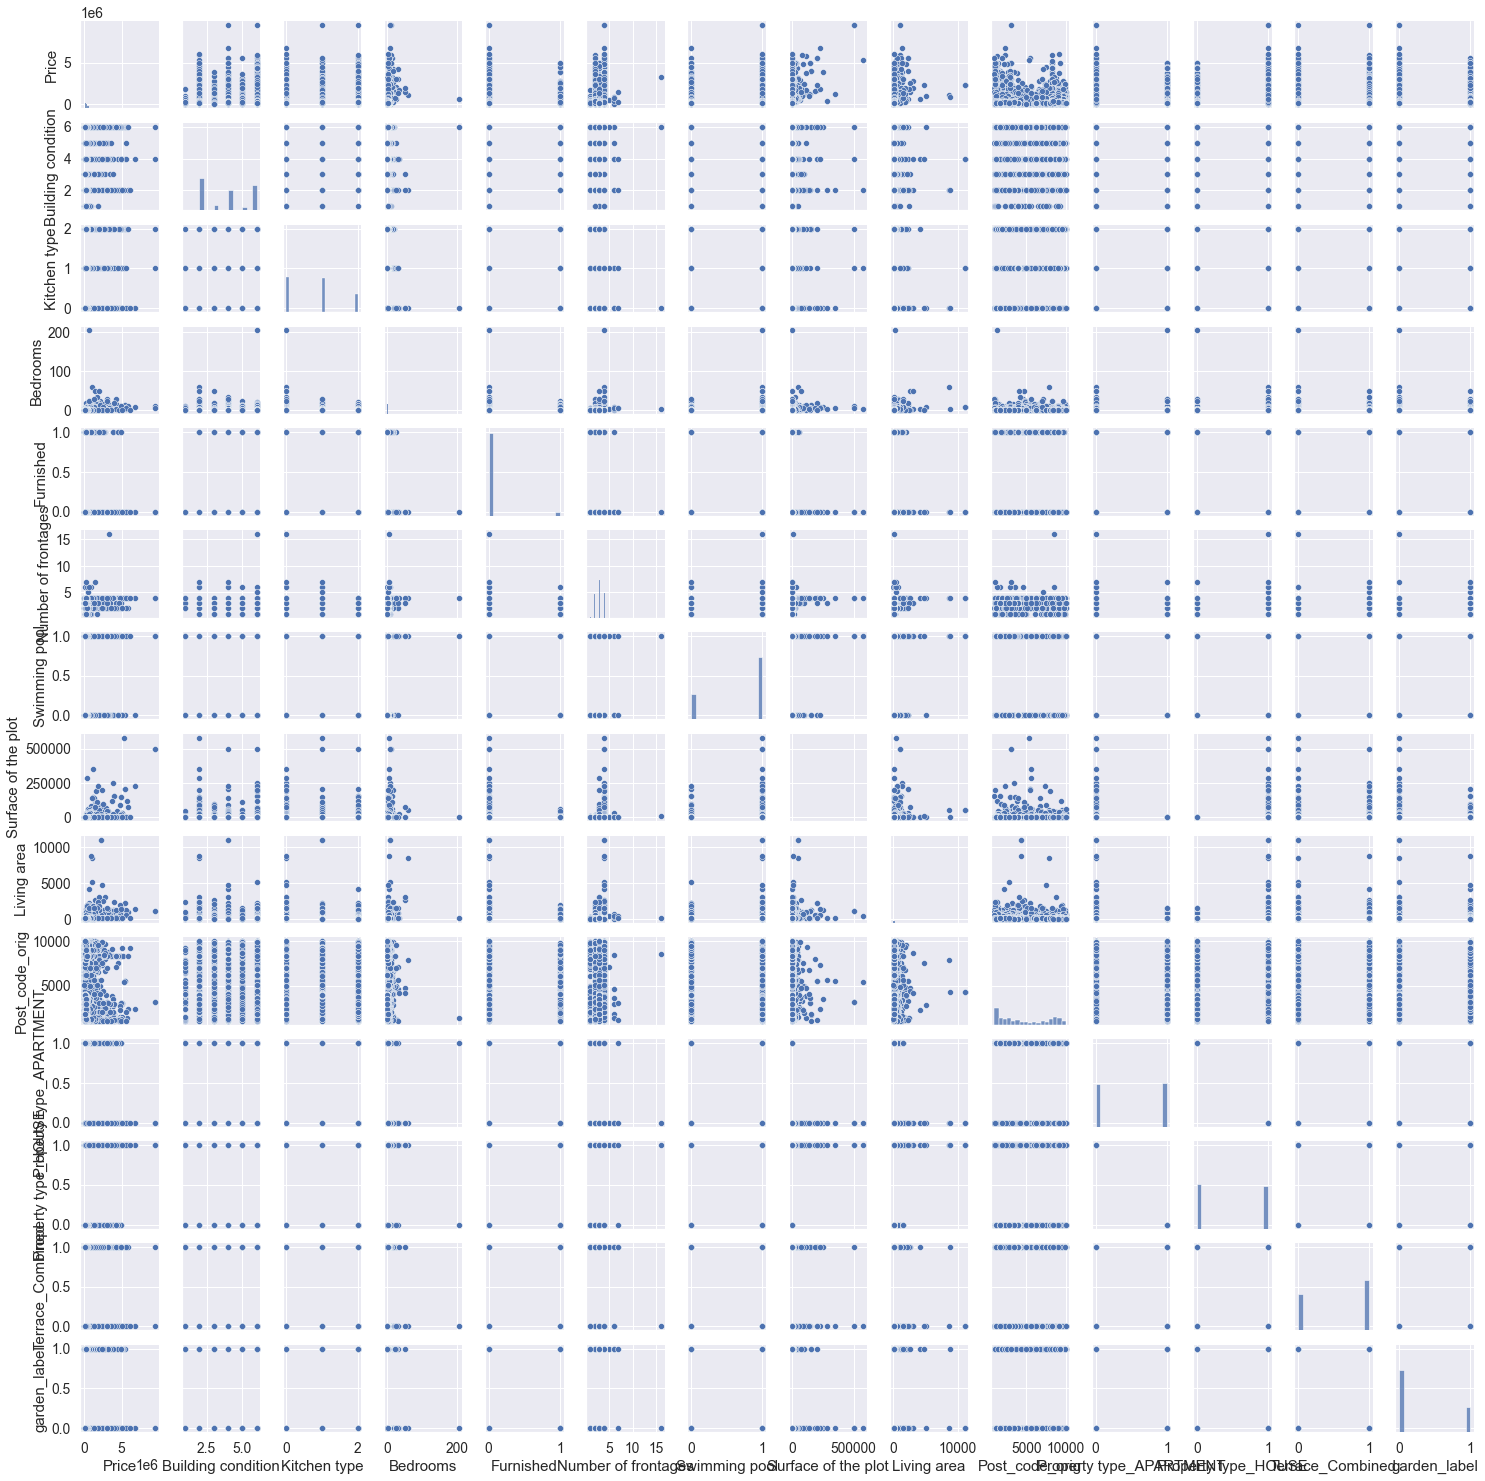

In [350]:
df_excluded = df_excluded_post_code.loc[:, ~df_excluded_post_code.columns.isin(['price/m2', 'Immoweb ID'])]

sns.pairplot(df_excluded, height=1.5)